# Urban Sound Classifier using CNN v2

In [1]:
# draw
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# basic handling
import os
import glob
import pickle
import numpy as np
# audio
import librosa
import librosa.display
import IPython.display
# normalization
import sklearn
# nn
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, AveragePooling2D, BatchNormalization
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import TensorBoard
keras.__version__

Using TensorFlow backend.


'2.2.0'

In [2]:
def show_history(history):
    print(history.history.keys())
    fig = plt.figure(figsize=(20,5))
    plt.subplot(121)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='lower left')
    plt.show()

In [3]:
train_x = pickle.load(open('./train_x.dat', 'rb'))
train_y = pickle.load(open('./train_y.dat', 'rb'))
val_x = pickle.load(open('./val_x.dat', 'rb'))
val_y = pickle.load(open('./val_y.dat', 'rb'))
test_x = pickle.load(open('./test_x.dat', 'rb'))
test_y = pickle.load(open('./test_y.dat', 'rb'))

train_x = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
val_x = val_x.reshape(val_x.shape[0],val_x.shape[1],val_x.shape[2],1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1],test_x.shape[2],1)

train_y = to_categorical(train_y)
val_y = to_categorical(val_y)
test_y = to_categorical(test_y)

In [4]:
model = Sequential()

model.add(Conv2D(32,(3,3),strides=(1,2),padding='same',activation='relu',kernel_initializer='uniform',input_shape = train_x.shape[1:]))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),strides=(1,2),padding='same',activation='relu',kernel_initializer='uniform'))
# model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
# model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary(line_length=80)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_1 (Conv2D)                   (None, 40, 87, 32)              320         
________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)      (None, 20, 43, 32)              0           
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 20, 43, 32)              0           
________________________________________________________________________________
conv2d_2 (Conv2D)                   (None, 20, 22, 64)              18496       
________________________________________________________________________________
conv2d_3 (Conv2D)                   (None, 20, 22, 64)              36928       
________________________________________________________________________________
batch_normalization_1 (Batch

Train on 2148 samples, validate on 538 samples
Epoch 1/20
2148/2148 [==============================] - 9s 4ms/step - loss: 3.5615 - acc: 0.1904 - val_loss: 9.3594 - val_acc: 0.0428
Epoch 2/20
2148/2148 [==============================] - 5s 2ms/step - loss: 2.1878 - acc: 0.3613 - val_loss: 2.5361 - val_acc: 0.1784
Epoch 3/20
2148/2148 [==============================] - 6s 3ms/step - loss: 1.8209 - acc: 0.4288 - val_loss: 4.0209 - val_acc: 0.2026
Epoch 4/20
2148/2148 [==============================] - 6s 3ms/step - loss: 1.5542 - acc: 0.4758 - val_loss: 2.8101 - val_acc: 0.1561
Epoch 5/20
2148/2148 [==============================] - 5s 2ms/step - loss: 1.2380 - acc: 0.5345 - val_loss: 1.9501 - val_acc: 0.3717
Epoch 6/20
2148/2148 [==============================] - 5s 3ms/step - loss: 0.9872 - acc: 0.6192 - val_loss: 5.0040 - val_acc: 0.2732
Epoch 7/20
2148/2148 [==============================] - 6s 3ms/step - loss: 0.8867 - acc: 0.6583 - val_loss: 2.8394 - val_acc: 0.4257
Epoch 8/20
2148

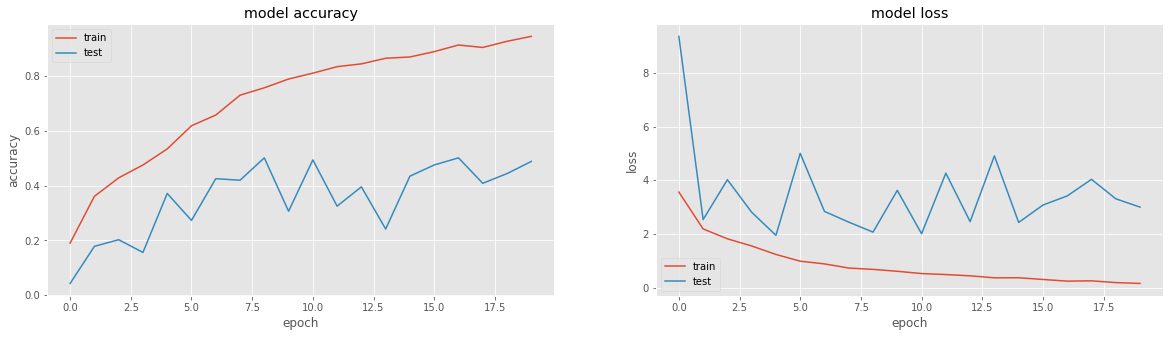

In [5]:
# callbacks=[TensorBoard(log_dir='./log')]
history = model.fit(train_x, train_y, 
                    epochs=20, batch_size=128, 
                    validation_split=0.2)
show_history(history)

In [7]:
model.evaluate(test_x,test_y)

837/837 [==============================] - 0s 389us/step


[2.5665002526490635, 0.5364396655431358]